# Twitter Sentiment Analysis with Random Forest
## What is Sentiment Analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.
<i>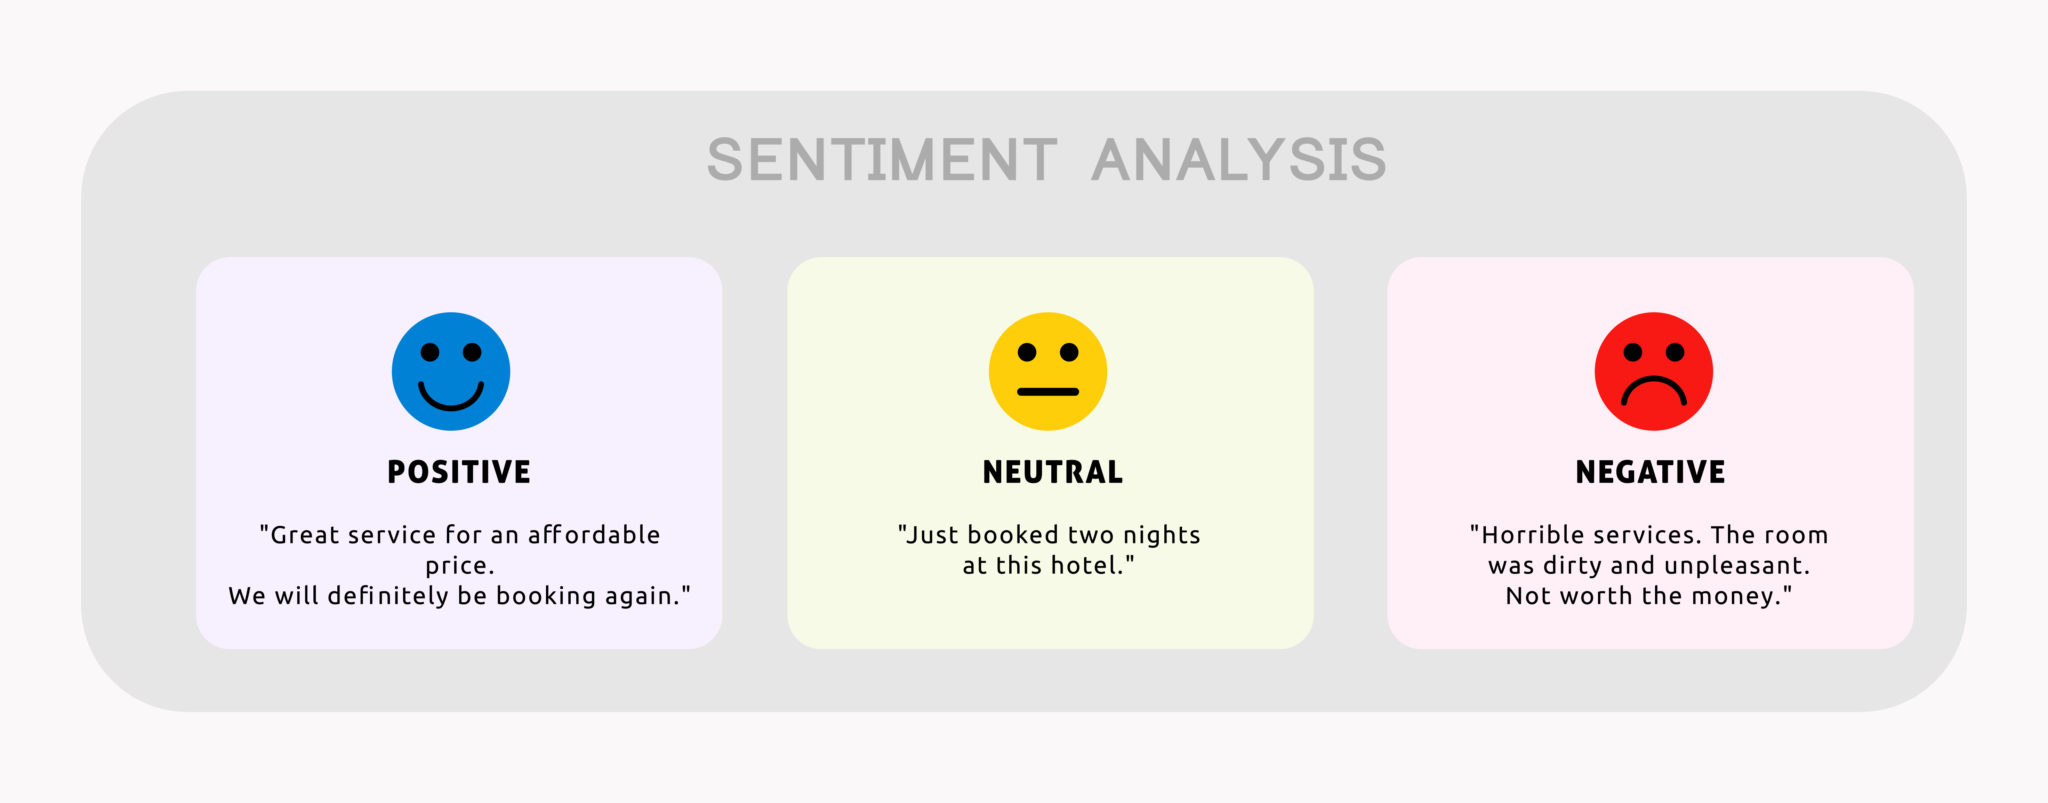

In [ ]:
#!pip install pandas

In [1]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv("data/twitter_sentiment.csv",header=None)


In [2]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.columns = ['id', 'product', 'sentiment', 'text']


In [4]:
print(df['sentiment'].value_counts())



sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64


In [5]:
df.head()

,id,product,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
# Example: view the text content of the row at index 5
pd.set_option('display.max_colwidth', None)  # To ensure entire content is shown
print(df.loc[35676, 'sentiment'])
print(df.loc[35676, 'text'])
print(df.loc[35676, 'product'])


Negative
@geekyranjit Hi bro this is the error for max windows 7pc 's whn i searched in internet regarding this issue i saw some articles they said The Microsoft Answers forums and Twitter are also filled with Windows 7 users reporting encountering the error when trying to shut down. pic.twitter.com/gI6mwJc2Jm
Microsoft


In [7]:
# Select the 'sentiment' and 'text' columns
df = df[['sentiment', 'text']].reset_index(drop=True)


In [8]:
df

,sentiment,text
0,Positive,"im getting on borderlands and i will murder you all ,"
1,Positive,"I am coming to the borders and I will kill you all,"
2,Positive,"im getting on borderlands and i will kill you all,"
3,Positive,"im coming on borderlands and i will murder you all,"
4,Positive,"im getting on borderlands 2 and i will murder you me all,"
...,...,...
75677,Irrelevant,"⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you need to finally make a move! blog.remax.ca/toronto-housin… twitter.com/kevinyoufool/s…"
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is like a netflix docu series for me. Can't wait for 2021.
75679,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [10]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [13]:
df

,sentiment,text
0,Positive,"im getting on borderlands and i will murder you all ,"
1,Positive,"I am coming to the borders and I will kill you all,"
2,Positive,"im getting on borderlands and i will kill you all,"
3,Positive,"im coming on borderlands and i will murder you all,"
4,Positive,"im getting on borderlands 2 and i will murder you me all,"
...,...,...
75677,Irrelevant,"⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you need to finally make a move! blog.remax.ca/toronto-housin… twitter.com/kevinyoufool/s…"
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is like a netflix docu series for me. Can't wait for 2021.
75679,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
#removing rows where the 'text' field is either empty or contains only a single character
df = df[df['text'].apply(len)>1]


In [15]:
df

,sentiment,text
0,Positive,"im getting on borderlands and i will murder you all ,"
1,Positive,"I am coming to the borders and I will kill you all,"
2,Positive,"im getting on borderlands and i will kill you all,"
3,Positive,"im coming on borderlands and i will murder you all,"
4,Positive,"im getting on borderlands 2 and i will murder you me all,"
...,...,...
75677,Irrelevant,"⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you need to finally make a move! blog.remax.ca/toronto-housin… twitter.com/kevinyoufool/s…"
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is like a netflix docu series for me. Can't wait for 2021.
75679,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [17]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

# Character counts
df['char_counts'] = df['text'].apply(len)

# Word counts
df['word_counts'] = df['text'].apply(lambda x: len(x.split()))

# Average word length
df['avg_wordlength'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Stopwords counts
stop_words = set(stopwords.words('english'))
df['stopwords_counts'] = df['text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

# Hashtag counts
df['hashtag_counts'] = df['text'].apply(lambda x: len(re.findall(r"#\w+", x)))

# Mentions counts
df['mentions_counts'] = df['text'].apply(lambda x: len(re.findall(r"@\w+", x)))

# Digits counts
df['digits_counts'] = df['text'].apply(lambda x: len(re.findall(r"\d", x)))

# Uppercase counts
df['uppercase_counts'] = df['text'].apply(lambda x: len([char for char in x if char.isupper()]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df.columns  

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [19]:
df

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,"im getting on borderlands and i will murder you all ,",53,11,3.909091,6,0,0,0,0
1,Positive,"I am coming to the borders and I will kill you all,",51,12,3.333333,6,0,0,0,2
2,Positive,"im getting on borderlands and i will kill you all,",50,10,4.100000,5,0,0,0,0
3,Positive,"im coming on borderlands and i will murder you all,",51,10,4.200000,5,0,0,0,0
4,Positive,"im getting on borderlands 2 and i will murder you me all,",57,12,3.833333,6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,"⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you need to finally make a move! blog.remax.ca/toronto-housin… twitter.com/kevinyoufool/s…",281,47,5.000000,19,0,0,4,9
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is like a netflix docu series for me. Can't wait for 2021.,248,46,4.391304,13,0,0,4,44
75679,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.,120,24,4.041667,9,0,0,0,2
75680,Positive,Bought a fraction of Microsoft today. Small wins.,49,8,5.250000,2,0,0,0,3


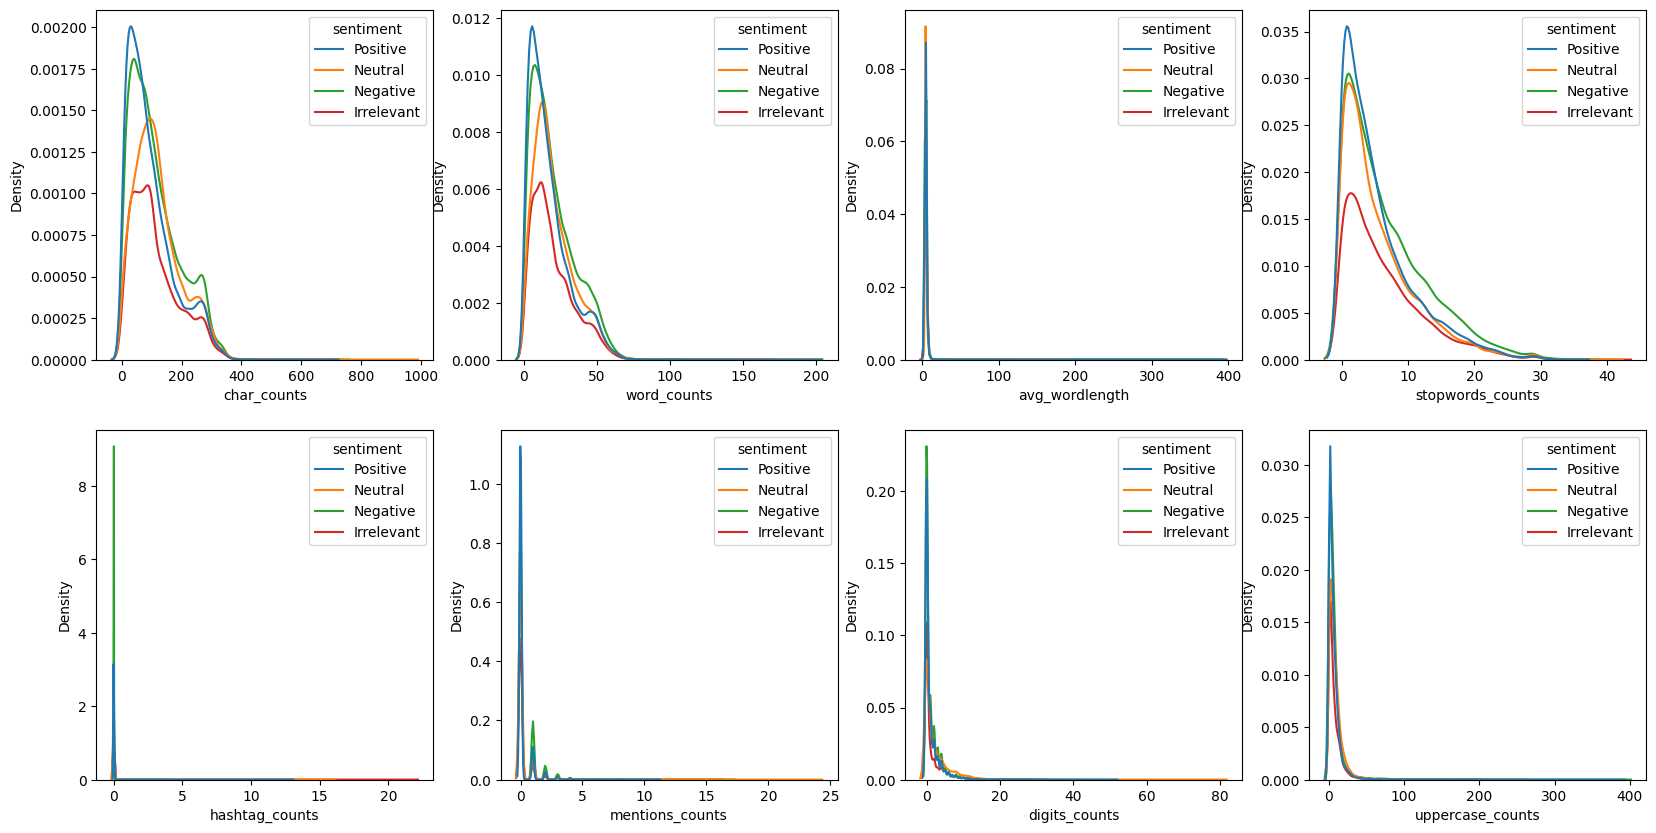

In [31]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1) #num_cols.get_loc(col) returns the index of the current column being plotted in the loop.
                                              #+1 is added because subplot numbering starts from 1 (not 0)
    # use sentiment as hue to see the distribution of each numerical feature
    #sns.distplot(df[col], label=col, color='red')
    #sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=False)

It is visible the length of Negative Tweets are larger than length of postive tweets as people tends to explain more what they dislike about the product

<Axes: ylabel='count'>

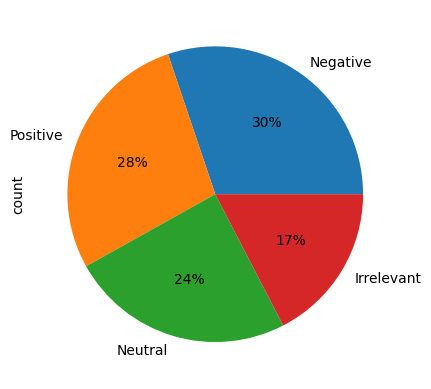

In [21]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [22]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

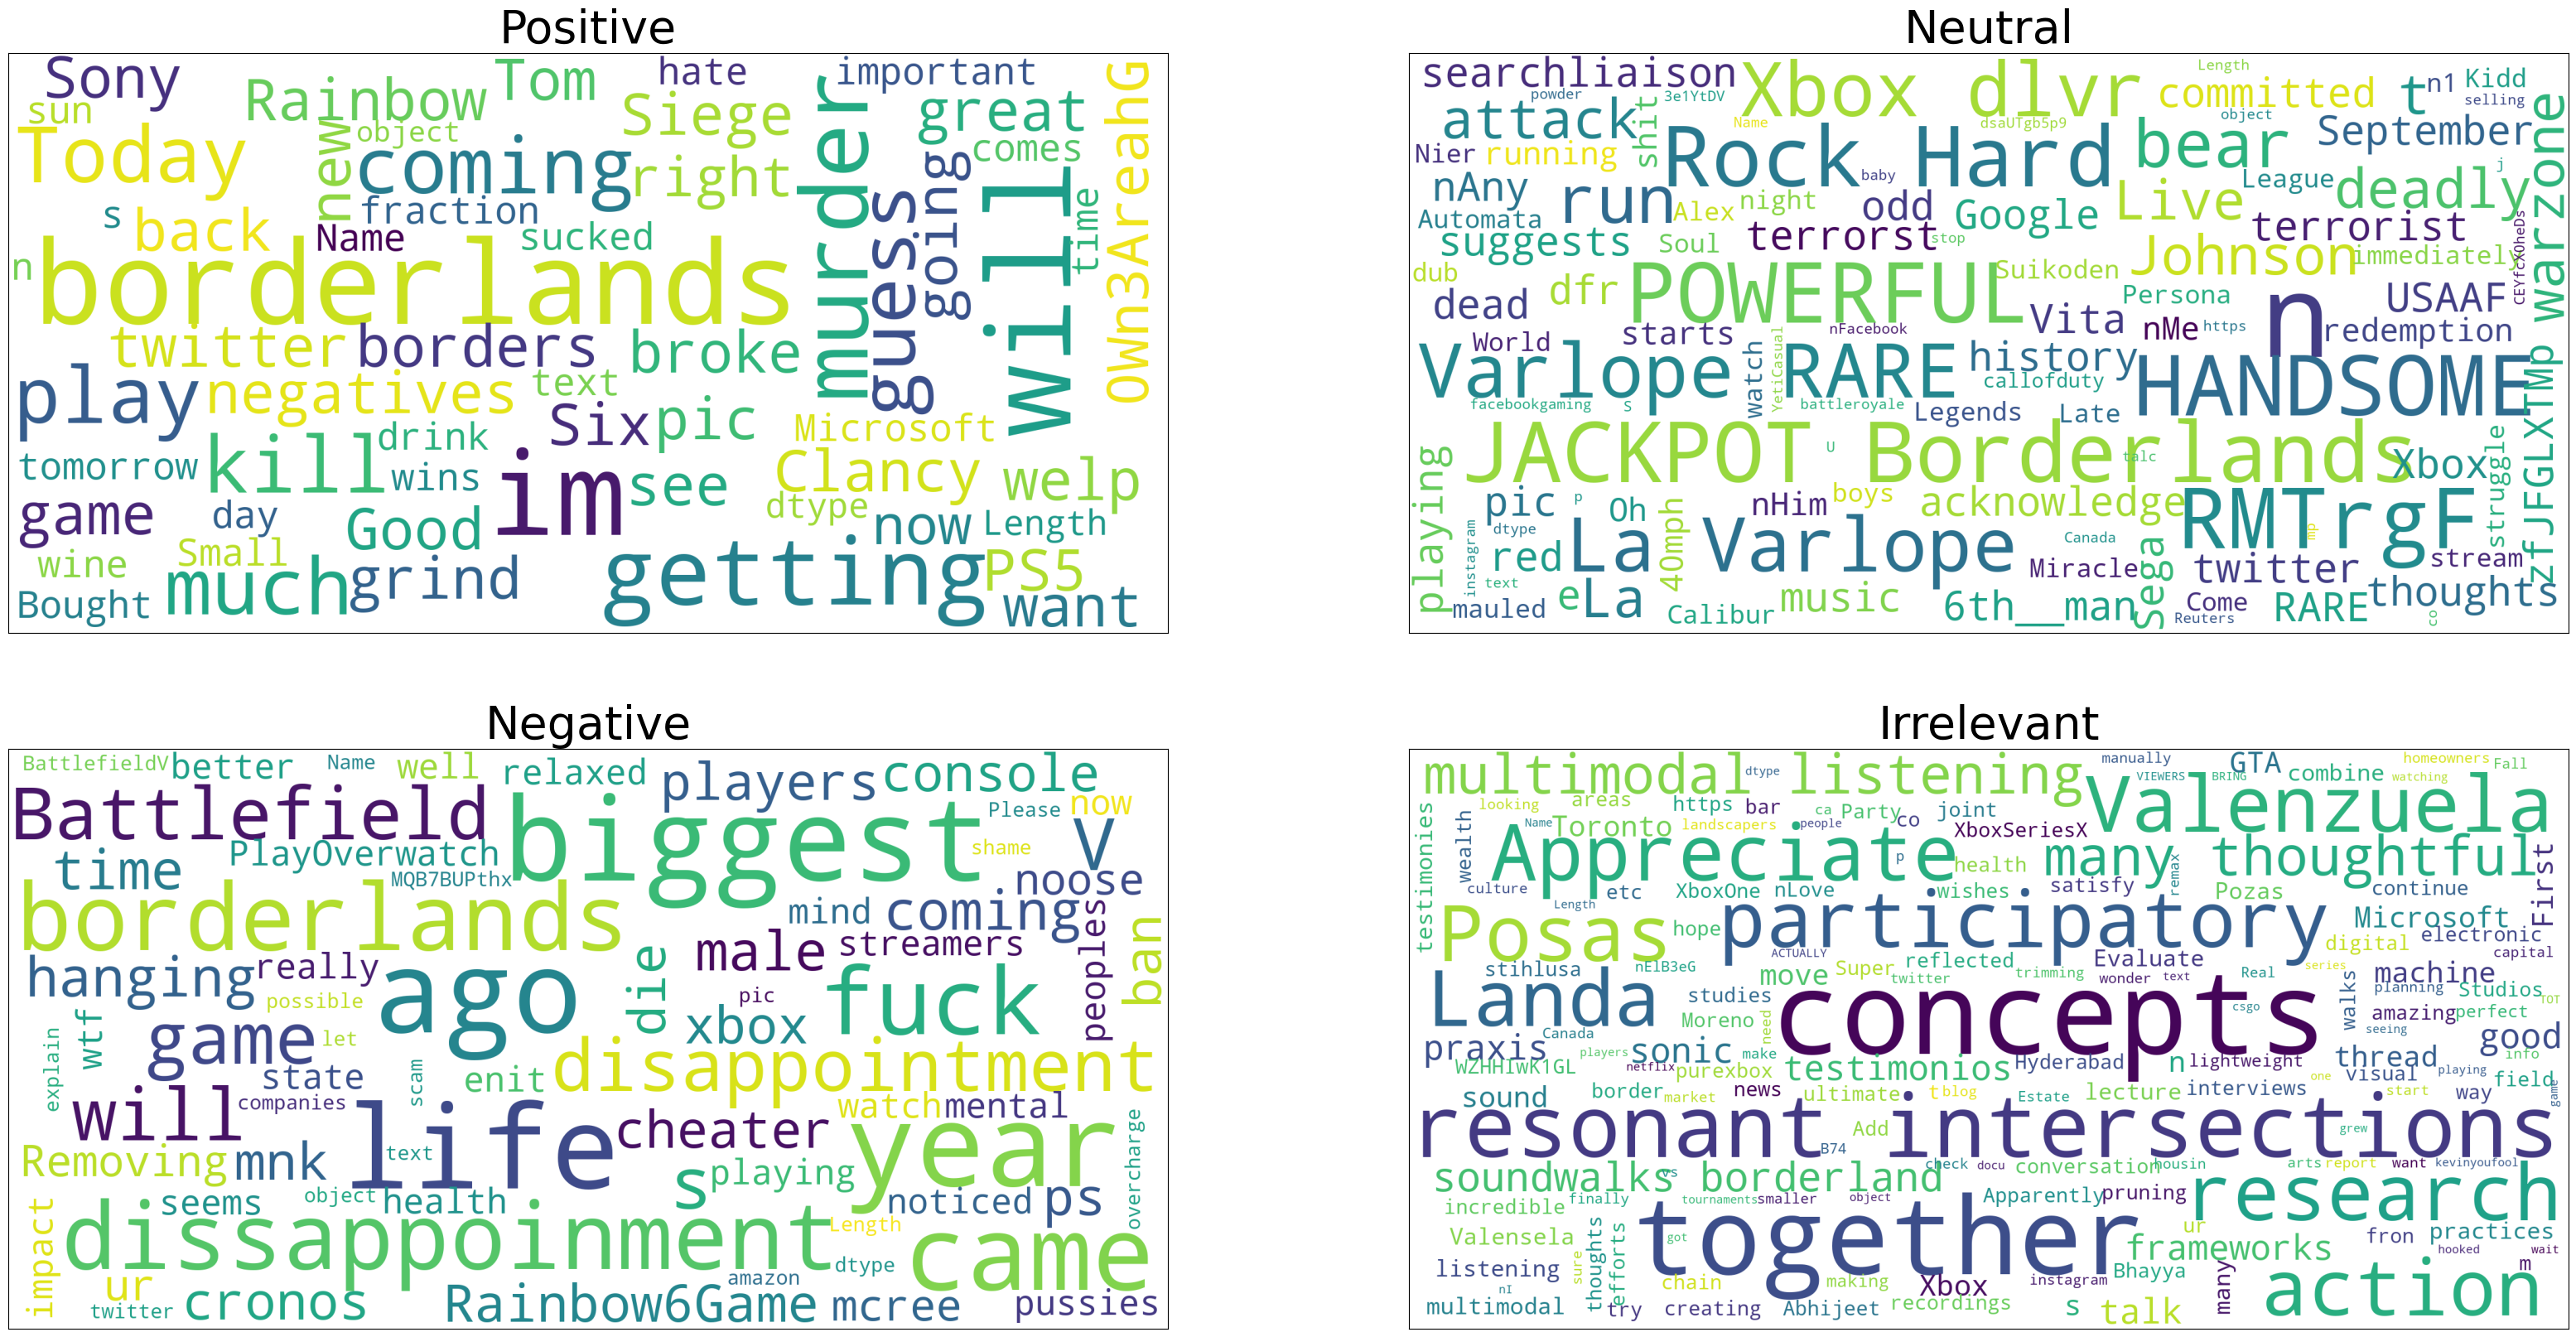

<Figure size 640x480 with 0 Axes>

In [23]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [24]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet
# 1. Lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

# 2. Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_urls)

# 3. Remove HTML tags
def remove_html_tags(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_html_tags)

# 4. Remove special characters (punctuations)
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df['text'] = df['text'].apply(remove_special_chars)

# 5. Remove RT (Retweet)
def remove_rt(text):
    return re.sub(r'\brt\b', '', text).strip()

df['text'] = df['text'].apply(remove_rt)

In [25]:
df


,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder you all,53,11,3.909091,6,0,0,0,0
1,Positive,i am coming to the borders and i will kill you all,51,12,3.333333,6,0,0,0,2
2,Positive,im getting on borderlands and i will kill you all,50,10,4.100000,5,0,0,0,0
3,Positive,im coming on borderlands and i will murder you all,51,10,4.200000,5,0,0,0,0
4,Positive,im getting on borderlands 2 and i will murder you me all,57,12,3.833333,6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,toronto is the arts and culture capital of canada its no wonder if you want to start planning be sure to check out our gta real estate market report for fall 2020 it has all the info you need to finally make a move blogremaxcatorontohousin twittercomkevinyoufools,281,47,5.000000,19,0,0,4,9
75678,Irrelevant,this is actually a good move tot bring more viewers\n\ni was one of those people who got hooked into csgo by watching tournaments first before playing the game and seeing these players grew is like a netflix docu series for me cant wait for 2021,248,46,4.391304,13,0,0,4,44
75679,Positive,today sucked so its time to drink wine n play borderlands until the sun comes up so i can hate myself all day tomorrow,120,24,4.041667,9,0,0,0,2
75680,Positive,bought a fraction of microsoft today small wins,49,8,5.250000,2,0,0,0,3


In [26]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [28]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Convert stopwords set to list
stopwords_list = list(stopwords)

clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list)), 
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['therefore', "he'd", 'more', 'can',
                                             'under', 'above', 'here',
                                             'between', 'been', "here's", 'it',
                                             "mustn't", 'most', 'themselves',
                                             'do', 'further', 'me', 'at',
                                             'would', 'below', 'when', 'there',
                                             'until', 'again', 'being', 'did',
                                             "i'd", 'an', 'same', 'http', ...])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [29]:
# evaluation
from sklearn.metrics import accuracy_score,classification_report

predictions = clf.predict(X_test)
print("acuracy=",accuracy_score(y_test, predictions))

# Print classification report
print(classification_report(y_test, predictions))


acuracy= 0.9136637642330877
              precision    recall  f1-score   support

  Irrelevant       0.96      0.86      0.91      2616
    Negative       0.93      0.93      0.93      4552
     Neutral       0.93      0.90      0.91      3679
    Positive       0.86      0.94      0.90      4083

    accuracy                           0.91     14930
   macro avg       0.92      0.91      0.91     14930
weighted avg       0.92      0.91      0.91     14930



In [32]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [38]:
# making predictions
clf.predict(['I will recommend this product to my friends as i greatly enjoyed it'])

array(['Positive'], dtype=object)